## Chapter 3: Linear Regression ##

### Simple Linear Regression ###

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [10]:
# Data from R ISLR package - write.csv(Boston, "Boston.csv", col.names = FALSE)
boston_df = pd.read_csv("../data/Boston.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


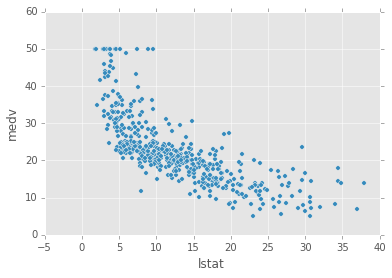

In [17]:
# LSTAT - % of population with low status; MEDV - median value of home
ax = boston_df.plot(kind='scatter', x="lstat", y="medv", style="o")
#ax.set_ylabel("medv")

In [12]:
# The statsmodels library provides a small subset of models, but has more emphasis on
# parameter estimation and statistical testing. The summary output is similar to R's
# summary function.
# X is an "array" of column values, y is a single column value
X = boston_df[["lstat"]].values
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 24 Sep 2015   Prob (F-statistic):           5.08e-88
Time:                        12:38:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================
"""

In [13]:
# Scikit Learn provides a larger number of models, but has more of a Machine Learning POV
# and doesn't come with the statistical testing data shown above. However, it produces an
# identical linear model as shown below:
reg = LinearRegression()
X = boston_df[["lstat"]].values
y = boston_df["medv"].values
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(34.553840879383124, array([-0.95004935]))

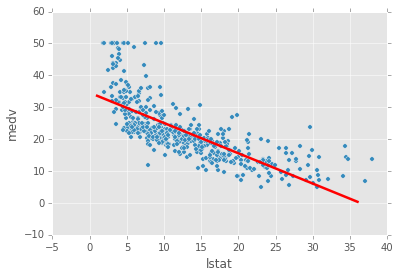

In [18]:
# Drawing the regression line on top of the scatterplot
ax = boston_df.plot(kind='scatter', x="lstat", y="medv", style="o")
#ax.set_ylabel("medv")

lstats = boston_df["lstat"].values
xs = range(int(np.min(X[:,0])), int(np.max(X[:,0])))
ys = [reg.predict([x]) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

In [19]:
# Prediction
test_data = [[5], [10], [15]]
reg.predict(test_data)

array([ 29.80359411,  25.05334734,  20.30310057])

### Multiple Linear Regression ###

In [20]:
# regression with 2 input columns
X = boston_df[["lstat", "age"]]
reg2 = LinearRegression()
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(33.222760531792915, array([-1.03206856,  0.03454434]))

In [21]:
# regression using all input columns
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
reg3 = LinearRegression()
reg3.fit(X, y)
(reg3.intercept_, reg3.coef_)

(36.459488385090367,
 array([ -1.08011358e-01,   4.64204584e-02,   2.05586264e-02,
         2.68673382e+00,  -1.77666112e+01,   3.80986521e+00,
         6.92224640e-04,  -1.47556685e+00,   3.06049479e-01,
        -1.23345939e-02,  -9.52747232e-01,   9.31168327e-03,
        -5.24758378e-01]))

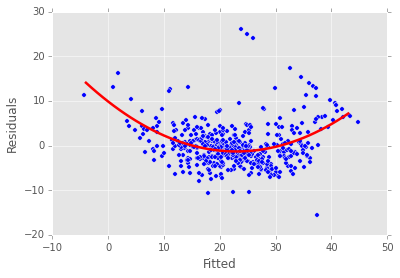

In [22]:
# Plotting a fitted regression with R returns 4 graphs - Residuals vs Fitted, Normal Q-Q,
# Scale-Location (Standardized Residuals vs Fitted), and Residuals vs Leverage. Only the 
# Q-Q plot is available from statsmodels. The residuals vs Fitted function is implemented
# below and is used for plot #1 and #3. The Residuals vs Leverage is TBD.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = reg3.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

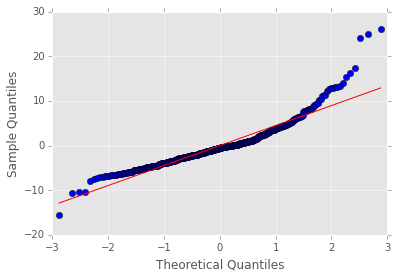

In [23]:
fig = sm.qqplot(residuals, dist="norm", line="r")

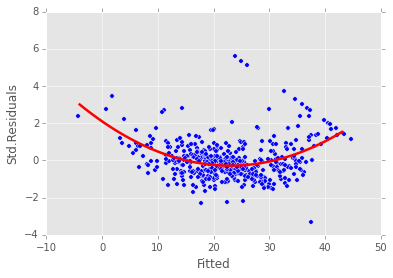

In [24]:
residuals_vs_fitted(fitted, std_residuals, "Fitted", "Std.Residuals")

### Nonlinear Terms and Interactions ###

Python offers formula parsing support via the [Patsy](http://patsy.readthedocs.org/en/latest/) toolkit. StatsModels uses Patsy to provide formula parsing support for its models. But this can be easily implemented as temporary columns in Pandas dataframes as shown below.

In [25]:
# fitting medv ~ lstat * age
boston_df["lstat*age"] = boston_df["lstat"] * boston_df["age"]
reg5 = LinearRegression()
X = boston_df[["lstat", "age", "lstat*age"]]
y = boston_df["medv"]
reg5.fit(X, y)
(reg5.intercept_, reg5.coef_)

(36.088535934612935,
 array([ -1.39211684e+00,  -7.20859509e-04,   4.15595185e-03]))

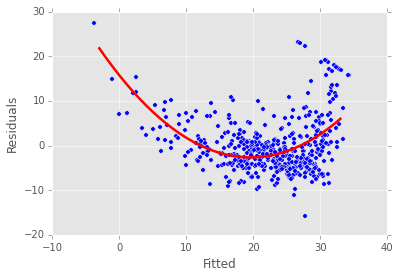

In [26]:
fitted = reg5.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [27]:
# fitting medv ~ lstat + I(lstat^2)
boston_df["lstat^2"] = boston_df["lstat"] ** 2
reg6 = LinearRegression()
X = boston_df[["lstat", "lstat^2"]]
y = boston_df["medv"]
reg6.fit(X, y)
# save the predicted ys for given xs for future plot
lstats = boston_df["lstat"].values
xs = range(int(np.min(lstats)), int(np.max(lstats)))
ys6 = [reg6.predict([x, x*x]) for x in xs]
(reg6.intercept_, reg6.coef_)

(42.862007328169398, array([-2.3328211 ,  0.04354689]))

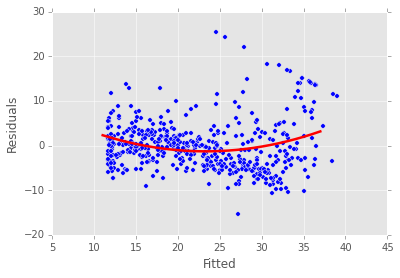

In [28]:
fitted = reg6.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [29]:
# fitting medv ~ poly(lstat,4). We already have lstat^2 and lstat from previous
boston_df["lstat^4"] = np.power(boston_df["lstat"], 4)
boston_df["lstat^3"] = np.power(boston_df["lstat"], 4)
X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
y = boston_df["medv"]
reg7 = LinearRegression()
reg7.fit(X, y)
ys7 = [reg7.predict([x**4, x**3, x**2, x]) for x in xs]
(reg7.intercept_, reg7.coef_)

(46.800943987797936,
 array([ -1.17511326e-05,  -1.17511403e-05,   9.23027375e-02,
        -3.27115207e+00]))

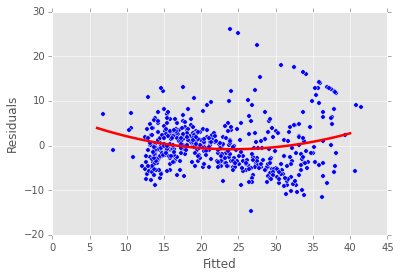

In [30]:
fitted = reg7.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

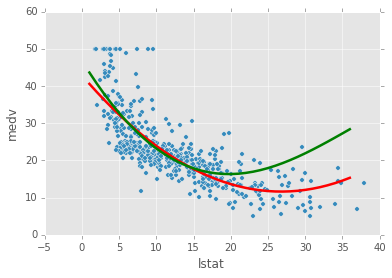

In [32]:
# Plot the different lines. Not that the green line (reg7) follows the distribution
# better than the red line (reg6).
ax = boston_df.plot(kind='scatter', x="lstat", y="medv", style="o")
#ax.set_ylabel("medv")
plt.plot(xs, ys6, color='r', linewidth=2.5)
plt.plot(xs, ys7, color='g', linewidth=2.5)

### Qualitative Predictors ###

In [33]:
# Data from ISLR package: write.csv(Carseats, 'Carseats.csv', col.names=FALSE)
carseats_df = pd.read_csv("../data/Carseats.csv")
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [34]:
# convert non-numeric to factors
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]
# Sales ~ . + Income:Advertising + Age:Price
carseats_df["Income:Advertising"] = carseats_df["Income"] * carseats_df["Advertising"]
carseats_df["Age:Price"] = carseats_df["Age"] * carseats_df["Price"]
X = carseats_df[carseats_df[1:].columns]
y = carseats_df["Sales"]
reg = LinearRegression()
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(3.1974423109204508e-14,
 array([  1.00000000e+00,  -4.91746142e-16,  -4.43222695e-17,
         1.67400815e-16,  -6.17627838e-17,   3.36180601e-16,
        -7.85707762e-17,  -1.41539205e-16,  -4.02408413e-17,
        -7.62651525e-17,  -9.64939934e-17,   2.60126465e-18,
         1.58152301e-18]))

In [35]:
# R has a contrasts() function that shows how factors are encoded by default. We can do 
# this manually using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

colnames = ["ShelveLoc", "Urban", "US"]
enc = OneHotEncoder()
X = carseats_df[colnames]
enc.fit(X)
X_tr = enc.transform(X).toarray()
colnos = enc.n_values_
colnames_tr = []
for (idx, colname) in enumerate(colnames):
    for i in range(0, colnos[idx]):
        colnames_tr.append(colname + "_" + str(i))
col = 0
for colname_tr in colnames_tr:
    carseats_df[colname_tr] = X_tr[:, col]
    col = col + 1
del carseats_df["ShelveLoc"]
del carseats_df["Urban"]
del carseats_df["US"]
carseats_df[colnames_tr].head()

,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
0,1,0,0,1,0,1,0
1,0,1,0,1,0,1,0
2,0,0,1,1,0,1,0
3,0,0,1,1,0,1,0
4,1,0,0,1,0,0,1


### Writing Functions ###

We write a convenience function to plot a scatter plot and a regression line of two variables.

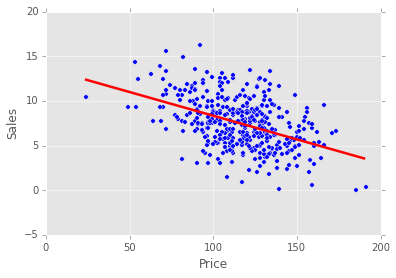

In [36]:
def regplot(x, y, xlabel, ylabel, dot_style, line_color):
    x = x.values
    y = y.values
    reg = LinearRegression()
    X = np.matrix(x).T
    reg.fit(X, y)
    ax = plt.scatter(x, y, marker=dot_style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    xs = range(int(np.min(x)), int(np.max(x)))
    ys = [reg.predict(x) for x in xs]
    plt.plot(xs, ys, color=line_color, linewidth=2.5)

regplot(carseats_df["Price"], carseats_df["Sales"], "Price", "Sales", 'o', 'r')